Importing modules

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nba_py 
from nba_py import player
import seaborn as sns

imporing data files

In [544]:
ncaa_stats = pd.read_csv('/home/bigley/Desktop/springboard/Basketball_Project/cleaned_data_NCAA.csv')
nba_stats = pd.read_csv('/home/bigley/Desktop/springboard/Basketball_Project/splits.csv')

AttributeError: 'list' object has no attribute 'text'

In [529]:
seasonlist = ('1992-93', '1993-94', '1994-95', '1995-95', '1996-97', '1997-98', '1997-98', 
              '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', 
              '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', 
              '2010-11', '2011-12', '2012-13', '2013-14','2014-15',
              '2015-16', '2016-17', '2017-18', '2018-19')
df_list = []
for year in seasonlist:
    yr = year.split('-')[0]
    data = pd.read_html('https://www.basketball-reference.com/leagues/NBA_'+yr+'_advanced.html')
    df = data[0]
    df['Year']=year
    df_list.append(df)
df_conc = pd.concat(df_list)

In [545]:
df_conc = pd.concat(df_list)
to_keep = ['Player', 'Pos', 'Age', 'Tm', 'USG%',
        'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Year']
df_conc = df_conc[to_keep]

AST  AST_PCT  AST_PCT_RANK  AST_RANK  \
DISPLAY_FIRST_LAST GROUP_VALUE                                         
Earl Cureton       1996-97      0.4    0.148             1         1   
Andrew Gaze        1998-99      0.3    0.182             1         1   
Chris Jent         1996-97      0.3    0.125             1         1   
Adonis Jordan      1998-99      0.8    0.273             1         1   
Chris King         1998-99      0.1    0.048             1         1   
Jimmy Oliver       1998-99      0.0    0.000             3         3   
                   1997-98      1.0    0.250             1         1   
                   1996-97      0.3    0.038             2         2   
Willie Burton      1998-99      0.0    0.000             3         3   
                   1997-98      0.1    0.043             2         2   
                   1996-97      0.5    0.056             1         1   
Tom Chambers       1997-98      0.0    0.000             2         2   
                   1996-97      0.3    0.077             1         1   
Lloyd Daniels      1997-98      0.7    0.089             2         2   
                   1996-97      1.2    0.135             1         1   
                   1996-97      1.5    0.139             1         1   
                   1996-97      0.2    0.083             3         3   
Blue Edwards       1998-99      1.3    0.190             1         3   
                   1997-98      2.5    0.170             2         1   
                   1996-97      1.9    0.140             3         2   
Negele Knight      1998-99      1.3    0.250             1         1   
Larry Krystkowiak  1996-97      1.0    0.273             1         1   
Eric Mobley        1996-97      0.5    0.076             1         1   
Brian Oliver       1997-98      0.4    0.047             1         1   
Fred Vinson        1999-00      0.0    0.000             1         1   
Ennis Whatley      1996-97      1.0    0.375             1         1   
Sharone Wright     1997-98      0.6    0.148             1         1   
                   1996-97      0.5    0.054             2         2   
Derrick Alston     1996-97      0.0    0.000             1         1   
Ashraf Amaya       1996-97      0.1    0.038             1         1   
...                             ...      ...           ...       ...   
Nick Young         2007-08      0.8    0.101             1         8   
Thaddeus Young     2017-18      1.9    0.086             4         3   
                   2016-17      1.6    0.082             5         5   
                   2015-16      1.9    0.094             3         4   
                   2014-15      2.3    0.118             1         1   
                   2014-15      1.4    0.073             8         8   
                   2014-15      2.8    0.143             1         1   
                   2013-14      2.3    0.114             2         2   
                   2012-13      1.6    0.078             6         6   
                   2011-12      1.2    0.070             9         9   
                   2010-11      1.0    0.067            10        11   
                   2009-10      1.4    0.075             7         7   
                   2008-09      1.1    0.057            11        10   
                   2007-08      0.8    0.056            12        12   
Cody Zeller        2017-18      0.9    0.075             4         5   
                   2016-17      1.6    0.087             3         2   
                   2015-16      1.0    0.061             5         4   
                   2014-15      1.6    0.106             1         1   
                   2013-14      1.1    0.106             2         3   
Tyler Zeller       2017-18      0.7    0.061             1         1   
                   2017-18      0.8    0.064             5         3   
                   2017-18      0.6    0.059             6         5   
                   2016-17      0.8    0.125             1         4   


In [547]:
nba_stats = nba_stats.set_index(['DISPLAY_FIRST_LAST', 'GROUP_VALUE'])
nba_stats['merge_year'] = nba_stats.index.get_level_values(1)
nba_stats['merge_player'] = nba_stats.index.get_level_values(0)
nba = nba_stats.reset_index()
nba_stats = nba.merge(df_conc, how = 'left', left_on=['merge_player', 'merge_year'], right_on=['Player', 'Year'])
#nba_stats_add['player'] = nba_stats.index.get_level_values(0)
nba_stats = nba_stats.set_index(['DISPLAY_FIRST_LAST', 'GROUP_VALUE'])

AST  AST_PCT  AST_PCT_RANK  AST_RANK  \
DISPLAY_FIRST_LAST GROUP_VALUE                                         
Earl Cureton       1996-97      0.4    0.148             1         1   
Andrew Gaze        1998-99      0.3    0.182             1         1   
Chris Jent         1996-97      0.3    0.125             1         1   
Adonis Jordan      1998-99      0.8    0.273             1         1   
Chris King         1998-99      0.1    0.048             1         1   
Jimmy Oliver       1998-99      0.0    0.000             3         3   
                   1997-98      1.0    0.250             1         1   
                   1997-98      1.0    0.250             1         1   
                   1996-97      0.3    0.038             2         2   
Willie Burton      1998-99      0.0    0.000             3         3   
                   1997-98      0.1    0.043             2         2   
                   1997-98      0.1    0.043             2         2   
                   1996-97      0.5    0.056             1         1   
Tom Chambers       1997-98      0.0    0.000             2         2   
                   1997-98      0.0    0.000             2         2   
                   1996-97      0.3    0.077             1         1   
Lloyd Daniels      1997-98      0.7    0.089             2         2   
                   1997-98      0.7    0.089             2         2   
                   1997-98      0.7    0.089             2         2   
                   1997-98      0.7    0.089             2         2   
                   1997-98      0.7    0.089             2         2   
                   1997-98      0.7    0.089             2         2   
                   1996-97      1.2    0.135             1         1   
                   1996-97      1.5    0.139             1         1   
                   1996-97      0.2    0.083             3         3   
Blue Edwards       1998-99      1.3    0.190             1         3   
                   1997-98      2.5    0.170             2         1   
                   1997-98      2.5    0.170             2         1   
                   1996-97      1.9    0.140             3         2   
Negele Knight      1998-99      1.3    0.250             1         1   
...                             ...      ...           ...       ...   
Thaddeus Young     2016-17      1.6    0.082             5         5   
                   2015-16      1.9    0.094             3         4   
                   2015-16      1.9    0.094             3         4   
                   2015-16      1.9    0.094             3         4   
                   2014-15      2.3    0.118             1         1   
                   2014-15      1.4    0.073             8         8   
                   2014-15      2.8    0.143             1         1   
                   2013-14      2.3    0.114             2         2   
                   2012-13      1.6    0.078             6         6   
                   2011-12      1.2    0.070             9         9   
                   2010-11      1.0    0.067            10        11   
                   2009-10      1.4    0.075             7         7   
                   2008-09      1.1    0.057            11        10   
                   2007-08      0.8    0.056            12        12   
Cody Zeller        2017-18      0.9    0.075             4         5   
                   2016-17      1.6    0.087             3         2   
                   2015-16      1.0    0.061             5         4   
                   2014-15      1.6    0.106             1         1   
                   2013-14      1.1    0.106             2         3   
Tyler Zeller       2017-18      0.7    0.061             1         1   
                   2017-18      0.8    0.064             5         3   
                   2017-18      0.6    0.059             6         5   
                   2016-17      0.8    0.125             1         4   


In [3]:
ncaa_stats.head()

,Unnamed: 0,Player,Class,Season,Pos,School,Conf,G,MP,PER,...,Three point frequency,Two point %,Three point %,ast-to-tov,fta to fga,Offensive reb split,Defensive reb split,fouls per min,blocks per min,steals per min
0,0,Matt Cline,NaN,2010-11,NaN,South Alabama,Sun Belt,1.0,1.0,327.4,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0
1,1,Jake Drum,SR,2011-12,F,Auburn,SEC,2.0,1.0,181.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Lamar Bradbury,JR,2011-12,F,Charlotte,A-10,1.0,1.0,181.2,...,1.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
3,3,Trey Ford,FR,2015-16,G,Appalachian State,Sun Belt,1.0,1.0,141.7,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,1.0,0.0,0.0
4,4,Hans Christian Lauer,JR,2015-16,F,Illinois-Chicago,Horizon,1.0,2.0,129.6,...,0.0,1.0,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.5


In [527]:
nba_stats.head()

AST  AST_PCT  AST_PCT_RANK  AST_RANK  \
DISPLAY_FIRST_LAST GROUP_VALUE                                         
Thomas Hamilton    1999-00      0.7    0.087             1         1   
Rafael Addison     1996-97      0.8    0.150             1         1   
Jerome Allen       1996-97      2.0    0.264             1         1   
                   1996-97      1.7    0.265             1         2   
                   1996-97      2.1    0.263             2         1   

                                AST_RATIO  AST_RATIO_RANK  AST_TO  \
DISPLAY_FIRST_LAST GROUP_VALUE                                      
Thomas Hamilton    1999-00           11.4               1    0.54   
Rafael Addison     1996-97           18.3               1    2.00   
Jerome Allen       1996-97           32.2               1    2.20   
                   1996-97           30.5               2    3.31   
                   1996-97           32.9               1    1.95   

                                AST_TO_RANK            BIRTHDATE  BLK  \
DISPLAY_FIRST_LAST GROUP_VALUE                                          
Thomas Hamilton    1999-00                1  1975-04-03T00:00:00  0.6   
Rafael Addison     1996-97                1  1964-07-22T00:00:00  0.1   
Jerome Allen       1996-97                1  1973-01-28T00:00:00  0.1   
                   1996-97                1  1973-01-28T00:00:00  0.2   
                   1996-97                2  1973-01-28T00:00:00  0.0   

                                     ...         WEIGHT  W_PCT  W_PCT_RANK_x  \
DISPLAY_FIRST_LAST GROUP_VALUE       ...                                       
Thomas Hamilton    1999-00           ...          330.0  0.273             1   
Rafael Addison     1996-97           ...          241.0  0.732             1   
Jerome Allen       1996-97           ...          184.0  0.355             1   
                   1996-97           ...          184.0  0.120             2   
                   1996-97           ...          184.0  0.471             1   

                                W_PCT_RANK_y  W_RANK_x W_RANK_y playerID_x  \
DISPLAY_FIRST_LAST GROUP_VALUE                                               
Thomas Hamilton    1999-00                 1         1        1        676   
Rafael Addison     1996-97                 1         1        1        912   
Jerome Allen       1996-97                 1         1        1        706   
                   1996-97                 2         2        2        706   
                   1996-97                 1         1        1        706   

                               playerID_y  merge_year     merge_player  
DISPLAY_FIRST_LAST GROUP_VALUE                                          
Thomas Hamilton    1999-00            676     1999-00  Thomas Hamilton  
Rafael Addison     1996-97            912     1996-97   Rafael Addison  
Jerome Allen       1996-97            706     1996-97     Jerome Allen  
                   1996-97            706     1996-97     Jerome Allen  
                   1996-97            706     1996-97     Jerome Allen  

[5 rows x 126 columns]

grab all NBA players from the NCAA stats

In [548]:
ncaa_stats= ncaa_stats.set_index(['Player', 'School'])
nba_stats_r = nba_stats.reset_index()
nba_stats_filt = nba_stats_r.set_index(['DISPLAY_FIRST_LAST', 'SCHOOL'])#set index to school so I can match to college data
ncaa_in_nba = ncaa_stats.loc[np.unique(nba_stats_filt.index)] #filter all the players in the college data to only those who played in the nba 
nba_stats = nba_stats.dropna(subset = ['HEIGHT', 'WEIGHT', 'BPM']) #drop rows that don't have height and weight 

In [549]:
nba_stats.describe()

,AST,AST_PCT,AST_PCT_RANK,AST_RANK,AST_RATIO,AST_RATIO_RANK,AST_TO,AST_TO_RANK,BLK,BLKA,...,USG_PCT_RANK,W,WEIGHT,W_PCT,W_PCT_RANK_x,W_PCT_RANK_y,W_RANK_x,W_RANK_y,playerID_x,playerID_y
count,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,...,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,12536.000000,1.253600e+04,1.253600e+04
mean,2.040204,0.139793,5.265475,5.193922,16.148109,5.222240,1.487126,5.170629,0.424418,0.450542,...,5.322671,26.478143,222.723516,0.490043,5.247049,5.247049,5.125479,5.125399,1.329728e+05,1.329728e+05
std,1.871230,0.096746,4.029137,3.991770,8.755072,4.000467,0.899430,3.977219,0.476496,0.315260,...,4.029902,15.974301,27.807879,0.179286,3.987154,3.987154,3.959867,3.959879,2.846782e+05,2.846782e+05
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,133.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,2.000000e+00
25%,0.700000,0.069000,2.000000,2.000000,9.700000,2.000000,0.850000,2.000000,0.100000,0.200000,...,2.000000,13.000000,200.000000,0.366000,2.000000,2.000000,2.000000,2.000000,1.531000e+03,1.531000e+03
50%,1.400000,0.108000,4.000000,4.000000,14.200000,4.000000,1.380000,4.000000,0.300000,0.400000,...,4.000000,25.000000,225.000000,0.500000,4.000000,4.000000,4.000000,4.000000,2.596500e+03,2.596500e+03
75%,2.800000,0.195000,8.000000,8.000000,21.600000,8.000000,2.000000,8.000000,0.500000,0.600000,...,8.000000,39.000000,245.000000,0.611000,8.000000,8.000000,7.000000,7.000000,2.019450e+05,2.019450e+05
max,12.800000,1.000000,23.000000,23.000000,66.700000,23.000000,20.000000,23.000000,6.000000,2.200000,...,23.000000,73.000000,325.000000,1.000000,23.000000,23.000000,23.000000,23.000000,1.628021e+06,1.628021e+06


In [600]:
#nba_stats.to_csv('nba_back.csv')
nba_stats.sort_index()
x = nba_stats['BPM'].loc['Detlef Schrempf', :].iloc[-5:-1]
x

GROUP_VALUE
1999-00    1.9
1998-99    2.9
1997-98    2.8
1997-98    2.8
Name: BPM, dtype: object

In [593]:
#calculate 4th year bpm
BPM4 = {}
for name in nba_stats.index.get_level_values(0):
    bpm = nba_stats['BPM'].loc[name, :].iloc[-5:-1]
    bpm = list(map(float, bpm))
    s=0
    for i in range(len(bpm)):
        b = bpm[i]
        s = s + b
    BPM4[name] = s
BPM4

{'Rafael Addison': 0,
 'Jerome Allen': -12.2,
 'Willie Anderson': -5.0,
 'Melvin Booker': -17.2,
 'Mike Brown': -9.8,
 'Sasha Danilovic': 0.8,
 'Kevin Duckworth': 0,
 'Acie Earl': -12.2,
 'Darrin Hancock': -11.100000000000001,
 'Frankie King': 0,
 'Jimmy King': 0,
 'Stacey King': -13.8,
 'Eric Leckner': -12.4,
 'Martin Lewis': 0,
 'Ed Pinckney': -2.4000000000000004,
 'Rumeal Robinson': -6.0,
 'Lou Roe': 0,
 'Byron Scott': 0,
 'Lionel Simmons': 0,
 'Charles Smith': -19.799999999999997,
 'Kenny Smith': -8.100000000000001,
 'Sedale Threatt': 0,
 'Wayman Tisdale': 0,
 'Robert Werdann': 0,
 'David Wood': -12.3,
 'Greg Anderson': -6.699999999999999,
 'Scott Brooks': -2.5000000000000004,
 'Reggie Geary': -13.200000000000001,
 'Jeff Grayer': -12.0,
 'Bobby Hurley': -27.2,
 'Charles Jones': -2.3000000000000003,
 'Priest Lauderdale': -20.4,
 'Alton Lister': -21.2,
 'Brad Lohaus': -23.499999999999996,
 'Nate McMillan': 11.299999999999999,
 'Martin Muursepp': -16.200000000000003,
 'Ivano Newbill':

In [599]:
BPM4['Detlef Schrempf']

10.399999999999999

In [7]:
physicals = nba_stats[['HEIGHT', 'WEIGHT', 'SEASON_EXP', 'FROM_YEAR']
physicals = physicals.set_index(physicals.index.get_level_values(0)) #go from multi index to index only by player
physicals = physicals[~physicals.index.duplicated(keep='last')] #drop duplicate index values (player names)
ncaa_in_nba_n = ncaa_in_nba.set_index(ncaa_in_nba.index.get_level_values(0)) #make indexes compatiable
ncaa_in_nba_n['Height'] = physicals['HEIGHT'] #create new columns from nba data
ncaa_in_nba_n['Weight'] = physicals['WEIGHT']
ncaa_in_nba_n['NBA_Experience'] = physicals['SEASON_EXP']
ncaa_in_nba_n['Rookie Year'] = physicals['FROM_YEAR']
#create column I forgot to in previous scripts 
ncaa_in_nba_n['fg_to_ast'] = ncaa_in_nba_n['FGA_x']/ncaa_in_nba_n['AST_x']

In [8]:
#change height from ft-in to inches
def height_convert(height):
    if type(height) != str:
        pass
    else:
        ht = height.split('-')
        ft = int(ht[0])
        inch =int(ht[1])
        height_in = ft*12 + inch
        return(float(height_in))
ncaa_in_nba_n['Height'] = ncaa_in_nba_n['Height'].apply(height_convert)


In [609]:
#add BPM4 to college stats
ncaa_in_nba_n['BPM4'] = np.NaN
for name in BPM4.keys():
    ncaa_in_nba_n['BPM4'].loc[name] = BPM4[name]

/home/bigley/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [617]:
ncaa_in_nba_n['BPM4'].describe()

count    1965.000000
mean       -5.171959
std        10.254249
min      -132.100000
25%       -10.200000
50%        -3.900000
75%         0.000000
max        29.900000
Name: BPM4, dtype: float64

In [616]:
ncaa_in_nba_n = ncaa_in_nba_n.dropna(subset = ['Height', 'Weight', 'BPM4', 'Class'])    
ncaa_in_nba_n

,Class,Season,Pos,Conf,G,MP,MP.1,FG_pg,FGA_pg,2P_pg,...,Defensive reb split,fouls per min,blocks per min,steals per min,Height,Weight,NBA_Experience,Rookie_Year,fg_to_ast,BPM4
A.J. Guyton,SR,1999-00,G,Big Ten,29.0,995.0,34.3,7.0,15.3,4.6,...,NaN,0.027136,0.013065,0.029146,74.0,185.0,3.0,2000.0,6.652174,-4.7
A.J. Guyton,SO,1997-98,G,Big Ten,32.0,NaN,NaN,5.9,12.6,3.4,...,NaN,NaN,NaN,NaN,74.0,185.0,3.0,2000.0,3.405405,-4.7
A.J. Guyton,JR,1998-99,G,Big Ten,34.0,1158.0,34.1,5.8,12.8,3.6,...,NaN,0.036269,0.012090,0.018998,74.0,185.0,3.0,2000.0,4.923077,-4.7
A.J. Guyton,FR,1996-97,G,Big Ten,33.0,1107.0,33.5,4.8,10.9,3.1,...,NaN,0.037940,0.015357,0.036134,74.0,185.0,3.0,2000.0,2.794872,-4.7
Aaron Brooks,SR,2006-07,G,Pac-10,35.0,1289.0,36.8,6.1,13.2,3.8,...,0.791946,0.068270,0.004655,0.037238,72.0,161.0,10.0,2007.0,3.069767,-0.7
Aaron Brooks,SO,2004-05,G,Pac-10,27.0,893.0,33.1,4.7,10.9,2.7,...,0.784091,0.064950,0.004479,0.030235,72.0,161.0,10.0,2007.0,2.369565,-0.7
Aaron Brooks,JR,2005-06,G,Pac-10,32.0,1036.0,32.4,3.6,8.8,2.2,...,0.772727,0.067568,0.004826,0.033784,72.0,161.0,10.0,2007.0,2.000000,-0.7
Aaron Brooks,FR,2003-04,G,Pac-10,21.0,541.0,25.8,2.2,5.9,0.9,...,0.800000,0.088725,0.000000,0.031423,72.0,161.0,10.0,2007.0,2.185185,-0.7
Aaron Gordon,FR,2013-14,F,Pac-12,38.0,1187.0,31.2,5.0,10.1,4.6,...,0.663366,0.075821,0.032856,0.028644,81.0,220.0,4.0,2014.0,5.050000,0.1
Aaron Gray,JR,2005-06,C,Big East,33.0,920.0,27.9,5.2,9.8,5.2,...,0.649275,0.093478,0.053261,0.022826,84.0,270.0,6.0,2007.0,5.444444,-1.7


In [620]:

ncaa_in_nba_n.columns

Index(['Class', 'Season', 'Pos', 'Conf', 'G', 'MP', 'MP.1', 'FG_pg', 'FGA_pg',
       '2P_pg', '2PA_pg', '3P_pg', '3PA_pg', 'FT_pg', 'FTA_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg', 'FG_t', 'FGA_t', '2P_t', '2PA_t', '3P_t', '3PA_t', 'FT_t',
       'FTA_t', 'ORB_t', 'DRB_t', 'TRB_t', 'AST_t', 'STL_t', 'BLK_t', 'TOV_t',
       'PF_t', 'PTS_t', 'Effective FG%', 'True Shooting%',
       'Two Point Frequency', 'Three point frequency', 'Two point %',
       'Three point %', 'ast-to-tov', 'fta to fga', 'Offensive reb split',
       'Defensive reb split', 'fouls per min', 'blocks per min',
       'steals per min', 'Height', 'Weight', 'NBA_Experience', 'Rookie_Year',
       'fg_to_ast', 'BPM4'],
      dtype='object')

In [618]:
to_drop = ['PER', 'TS%', 'OWS', 'DWS', 'WS', 'Rk', 'Unnamed: 0']

In [11]:
name_cols = ['Class', 'Season', 'Pos', 'Conf', 'G', 'MP', 'MP.1', 'FG_pg', 'FGA_pg',
       '2P_pg', '2PA_pg', '3P_pg', '3PA_pg', 'FT_pg', 'FTA_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg', 'FG_t', 'FGA_t', '2P_t', '2PA_t', '3P_t', '3PA_t', 'FT_t',
       'FTA_t', 'ORB_t', 'DRB_t', 'TRB_t', 'AST_t', 'STL_t', 'BLK_t', 'TOV_t',
       'PF_t', 'PTS_t', 'Effective FG%', 'True Shooting%',
       'Two Point Frequency', 'Three point frequency', 'Two point %',
       'Three point %', 'ast-to-tov', 'fta to fga', 'Offensive reb split',
       'Defensive reb split', 'fouls per min', 'blocks per min',
       'steals per min', 'Height', 'Weight', 'NBA_Experience', 'Rookie_Year',
       'fg_to_ast', 'BPM4'] #rename columns

In [252]:
cols_to_use = ['FG_pg', '3PA_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'Effective FG%', 'TOV_pg',
       'True Shooting%', 'Two Point Frequency', 'Three point frequency', 
        'ast-to-tov', 'fta to fga', 'Offensive reb split', 'Defensive reb split', 
        'fouls per min', 'blocks per min', 'steals per min', 'Height', 'Weight' ]

In [619]:
ncaa_in_nba_n=ncaa_in_nba_n.drop(to_drop, axis=1)

ValueError: labels ['PER' 'TS%' 'OWS' 'DWS' 'WS' 'Rk' 'Unnamed: 0'] not contained in axis

In [13]:
ncaa_in_nba_n.columns =name_cols

In [621]:
def fix_3pt(percent):
    if np.isnan(percent) == True:
        return(0.0)
    else:
        return(percent)
ncaa_in_nba_n['Three point %']= ncaa_in_nba_n['Three point %'].apply(fix_3pt)

/home/bigley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [622]:
ncaa_clean = ncaa_in_nba_n.dropna( subset=['Conf', 'MP.1', 'ast-to-tov', 'fouls per min'], axis = 0)

In [630]:
ncaa_clean['BPM4'].loc['Stephen Curry']

Stephen Curry    18.1
Stephen Curry    18.1
Stephen Curry    18.1
Name: BPM4, dtype: float64

In [633]:
ncaa_clean[ncaa_clean['Rookie_Year'] < 2013]['BPM4'].describe()

count    1479.000000
mean       -4.830629
std        10.744612
min      -132.100000
25%        -9.800000
50%        -3.800000
75%         0.000000
max        29.900000
Name: BPM4, dtype: float64

In [694]:
ncaa_clean['Conf']

A.J. Guyton             Big Ten
A.J. Guyton             Big Ten
A.J. Guyton             Big Ten
Aaron Brooks             Pac-10
Aaron Brooks             Pac-10
Aaron Brooks             Pac-10
Aaron Brooks             Pac-10
Aaron Gordon             Pac-12
Aaron Gray             Big East
Aaron Gray             Big East
Aaron Gray             Big East
Aaron Harrison              SEC
Aaron Harrison              SEC
Aaron McKie                A-10
Aaron McKie                A-10
Acie Earl               Big Ten
Acie Law                 Big 12
Acie Law                 Big 12
Acie Law                 Big 12
Acie Law                 Big 12
Adam Morrison               WCC
Adam Morrison               WCC
Adam Morrison               WCC
Adonal Foyle            Patriot
Adonal Foyle            Patriot
Adonal Foyle            Patriot
Adrian Griffin         Big East
Adrian Griffin         Big East
Adrian Griffin         Big East
Adrian Griffin         Big East
                         ...   
Wayne Si

In [634]:
ncaa_clean[ncaa_clean['Rookie_Year'] < 2013].corr()

,G,MP,MP.1,FG_pg,FGA_pg,2P_pg,2PA_pg,3P_pg,3PA_pg,FT_pg,...,Defensive reb split,fouls per min,blocks per min,steals per min,Height,Weight,NBA_Experience,Rookie_Year,fg_to_ast,BPM4
G,1.000000,0.564961,0.079348,0.030292,0.015236,0.004007,-0.010285,0.050924,0.038144,-0.032744,...,0.066735,-0.128660,-0.033501,0.023343,-0.034717,-0.041393,0.007848,0.231680,-0.073575,0.016243
MP,0.564961,1.000000,0.854454,0.607444,0.637278,0.429433,0.473912,0.395402,0.405682,0.490673,...,0.331660,-0.622611,-0.210009,0.123495,-0.264180,-0.243291,0.062647,0.036142,-0.236332,0.075152
MP.1,0.079348,0.854454,1.000000,0.727088,0.773244,0.529080,0.592490,0.445539,0.469366,0.627101,...,0.362523,-0.683811,-0.234674,0.141358,-0.301933,-0.269621,0.077581,-0.121449,-0.242922,0.073226
FG_pg,0.030292,0.607444,0.727088,1.000000,0.933400,0.868359,0.880178,0.347366,0.350688,0.718363,...,0.145783,-0.444195,-0.051403,0.066337,-0.043581,0.002733,0.108406,-0.183068,0.065482,0.098909
FGA_pg,0.015236,0.637278,0.773244,0.933400,1.000000,0.690817,0.783832,0.551134,0.583742,0.674145,...,0.281530,-0.555265,-0.231465,0.177786,-0.241544,-0.203379,0.073810,-0.157877,-0.052680,0.071048
2P_pg,0.004007,0.429433,0.529080,0.868359,0.690817,1.000000,0.963772,-0.162692,-0.148868,0.664240,...,-0.131229,-0.187637,0.227920,-0.093237,0.271081,0.334157,0.112481,-0.186329,0.236417,0.074602
2PA_pg,-0.010285,0.473912,0.592490,0.880178,0.783832,0.963772,1.000000,-0.070953,-0.046461,0.689588,...,-0.054143,-0.263512,0.138936,-0.039663,0.172183,0.237818,0.093128,-0.181671,0.192927,0.050175
3P_pg,0.050924,0.395402,0.445539,0.347366,0.551134,-0.162692,-0.070953,1.000000,0.979406,0.174439,...,0.506873,-0.527781,-0.533220,0.308278,-0.598450,-0.624068,0.003697,-0.010416,-0.316335,0.055533
3PA_pg,0.038144,0.405682,0.469366,0.350688,0.583742,-0.148868,-0.046461,0.979406,1.000000,0.182426,...,0.508866,-0.549129,-0.554906,0.338184,-0.614023,-0.638933,-0.003006,-0.015918,-0.337085,0.048219
FT_pg,-0.032744,0.490673,0.627101,0.718363,0.674145,0.664240,0.689588,0.174439,0.182426,1.000000,...,0.168466,-0.320673,-0.064201,0.066187,-0.053162,0.029068,0.106513,-0.135862,-0.016605,0.101552


In [695]:
ncaa_clean.columns
ncaa_clean['Class'] = ncaa_clean['Class'].astype('category')
ncaa_clean['Pos'] = ncaa_clean['Pos'].astype('category')
ncaa_clean['Conf'] = ncaa_clean['Conf'].astype('category')

/home/bigley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bigley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bigley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

A.J. Guyton            G
A.J. Guyton            G
A.J. Guyton            G
Aaron Brooks           G
Aaron Brooks           G
Aaron Brooks           G
Aaron Brooks           G
Aaron Gordon           F
Aaron Gray             C
Aaron Gray             C
Aaron Gray             C
Aaron Harrison         G
Aaron Harrison         G
Aaron McKie            G
Aaron McKie            G
Acie Earl              F
Acie Law               G
Acie Law               G
Acie Law               G
Acie Law               G
Adam Morrison          F
Adam Morrison          F
Adam Morrison          F
Adonal Foyle           C
Adonal Foyle           C
Adonal Foyle           C
Adrian Griffin         F
Adrian Griffin         F
Adrian Griffin         F
Adrian Griffin         F
                      ..
Wayne Simien           F
Wayne Simien           F
Wesley Matthews        G
Wesley Matthews        G
Wesley Matthews        G
Wesley Matthews        G
Wesley Person          G
Wesley Person          G
Will Barton            G


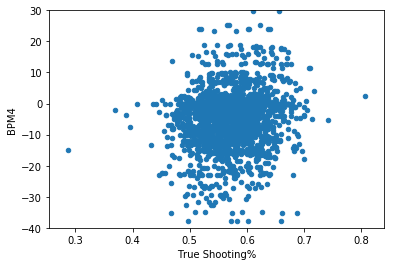

In [641]:
ncaa_clean.plot(x='True Shooting%', y = 'BPM4', kind = 'scatter')
plt.ylim(-40,30)
plt.show() 

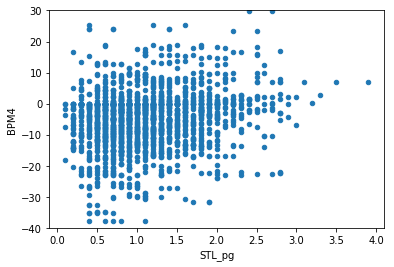

In [642]:
ncaa_clean.plot(x='STL_pg', y = 'BPM4', kind = 'scatter')
plt.ylim(-40,30)
plt.show() 

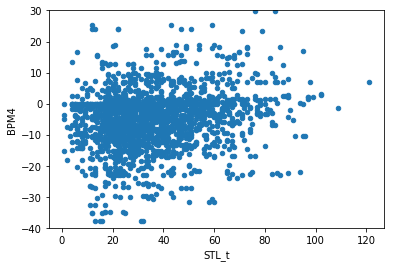

In [643]:
ncaa_clean.plot(x='STL_t', y = 'BPM4', kind = 'scatter')
plt.ylim(-40,30)
plt.show()

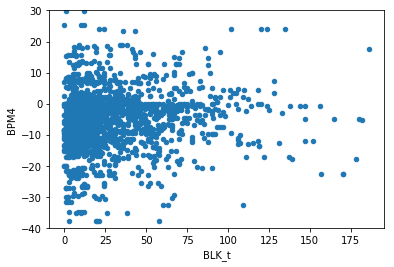

In [644]:
ncaa_clean.plot(x='BLK_t', y = 'BPM4', kind = 'scatter')
plt.ylim(-40,30)
plt.show()

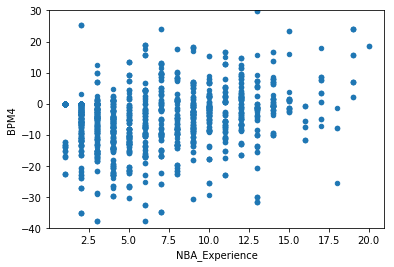

In [646]:
ncaa_clean.plot(x='NBA_Experience', y = 'BPM4', kind = 'scatter')
plt.ylim(-40,30)
plt.show() #higher bpm means you'll be in the league longer, good sanity check

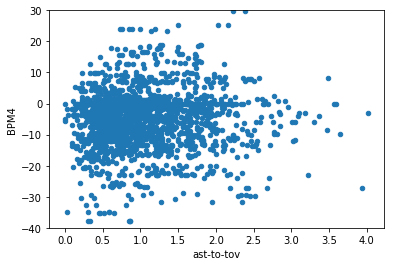

In [652]:
ncaa_clean.plot(x='ast-to-tov', y = 'BPM4', kind = 'scatter')
plt.ylim(-40,30)
plt.show()

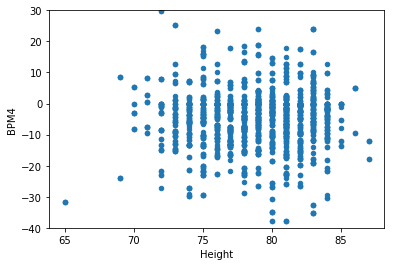

In [655]:
ncaa_clean.plot(x='Height', y = 'BPM4', kind = 'scatter')
plt.ylim(-40,30)
plt.show() #no relation between bpm and height?

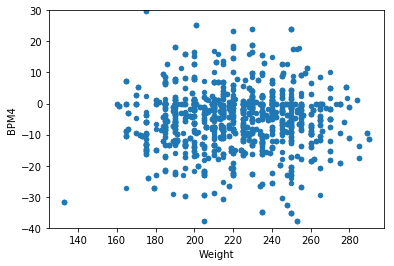

In [656]:
ncaa_clean.plot(x='Weight', y = 'BPM4', kind = 'scatter')
plt.ylim(-40,30)
plt.show() # or weight?

In [702]:
ncaa_clean.groupby('Season').mean().columns

Index(['G', 'MP', 'MP.1', 'FG_pg', 'FGA_pg', '2P_pg', '2PA_pg', '3P_pg',
       '3PA_pg', 'FT_pg', 'FTA_pg', 'ORB_pg', 'DRB_pg', 'TRB_pg', 'AST_pg',
       'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg', 'PTS_pg', 'FG_t', 'FGA_t',
       '2P_t', '2PA_t', '3P_t', '3PA_t', 'FT_t', 'FTA_t', 'ORB_t', 'DRB_t',
       'TRB_t', 'AST_t', 'STL_t', 'BLK_t', 'TOV_t', 'PF_t', 'PTS_t',
       'Effective FG%', 'True Shooting%', 'Two Point Frequency',
       'Three point frequency', 'Two point %', 'Three point %', 'ast-to-tov',
       'fta to fga', 'Offensive reb split', 'Defensive reb split',
       'fouls per min', 'blocks per min', 'steals per min', 'Height', 'Weight',
       'NBA_Experience', 'Rookie_Year', 'fg_to_ast', 'BPM4'],
      dtype='object')

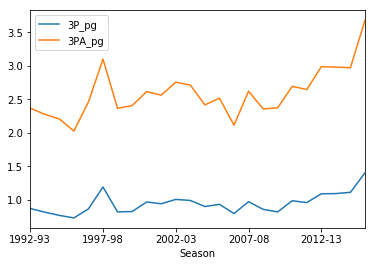

In [672]:
ncaa_clean.groupby('Season').mean().plot(y=['3P_pg', '3PA_pg'])
plt.show() #another sanity check, three pointers have been increasing recently

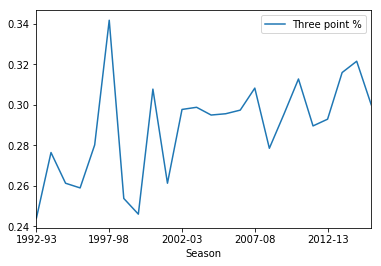

In [676]:
ncaa_clean.groupby('Season').mean().plot(y=['Three point %'])
plt.show()

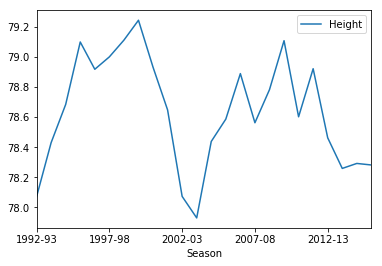

In [673]:
ncaa_clean.groupby('Season').mean().plot(y=['Height'])
plt.show() #no trend in height

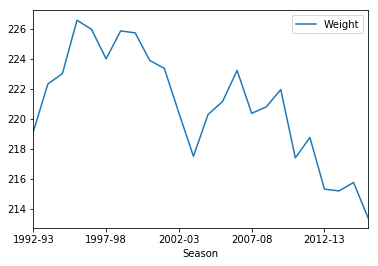

In [674]:
ncaa_clean.groupby('Season').mean().plot(y=['Weight'])
plt.show() #but a significant trend in weight!

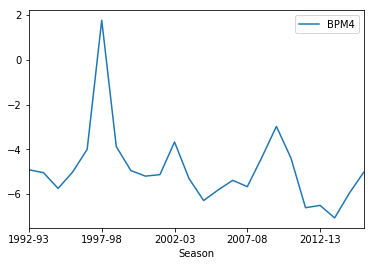

In [677]:
ncaa_clean.groupby('Season').mean().plot(y=['BPM4'])
plt.show() #no real trend in bpm across years

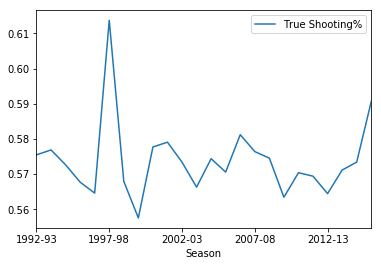

In [703]:
ncaa_clean.groupby('Season').mean().plot(y=['True Shooting%'])
plt.show()

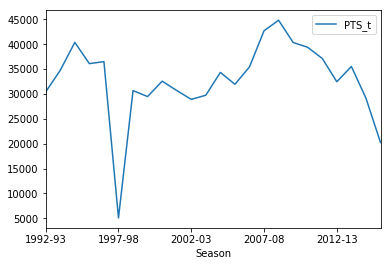

In [704]:
ncaa_clean.groupby('Season').sum().plot(y=['PTS_t'])
plt.show()

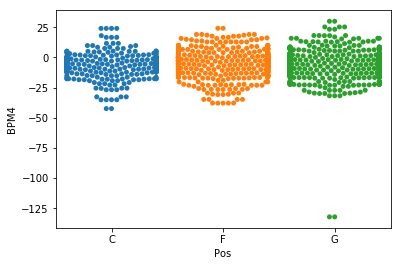

In [698]:
import seaborn as sns
sns.swarmplot(x="Pos", y="BPM4", data=ncaa_clean)
plt.show()

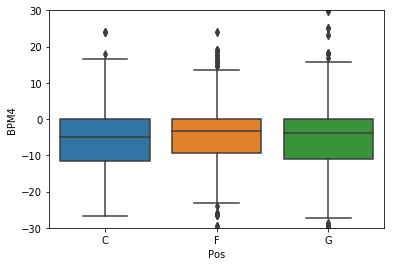

In [701]:
sns.boxplot(x="Pos", y="BPM4", data=ncaa_clean)
plt.ylim(-30,30)
plt.show()

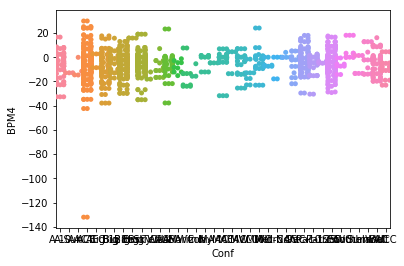

In [697]:
sns.swarmplot(x="Conf", y="BPM4", data=ncaa_clean)
plt.show() #how to plot this better?


In [21]:
ncaa_clean['Pos'] = ncaa_clean['Pos'].astype('category')

/home/bigley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [259]:
ncaa_clean.columns

Index(['Class', 'Season', 'Pos', 'Conf', 'G', 'MP', 'MP.1', 'FG_pg', 'FGA_pg',
       '2P_pg', '2PA_pg', '3P_pg', '3PA_pg', 'FT_pg', 'FTA_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg', 'FG_t', 'FGA_t', '2P_t', '2PA_t', '3P_t', '3PA_t', 'FT_t',
       'FTA_t', 'ORB_t', 'DRB_t', 'TRB_t', 'AST_t', 'STL_t', 'BLK_t', 'TOV_t',
       'PF_t', 'PTS_t', 'Effective FG%', 'True Shooting%',
       'Two Point Frequency', 'Three point frequency', 'Two point %',
       'Three point %', 'ast-to-tov', 'fta to fga', 'Offensive reb split',
       'Defensive reb split', 'fouls per min', 'blocks per min',
       'steals per min', 'Height', 'Weight', 'NBA_Experience', 'Rookie_Year',
       'fg_to_ast'],
      dtype='object')

In [288]:
cols_to_use = ['MP', '2PA_pg', '3PA_pg', 'FTA_pg','AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg', 'Effective FG%', 'True Shooting%',
       'Two Point Frequency', 'Three point frequency', 'Two point %',
       'Three point %', 'ast-to-tov', 'fta to fga', 'Offensive reb split',
       'Defensive reb split', 'fouls per min', 'blocks per min',
       'steals per min', 'Height', 'Weight', 'NBA_Experience', 'Rookie_Year',
       'fg_to_ast']

In [324]:
cols_to_use = ['FGA_pg', '3PA_pg', 'ORB_pg', 'MP',
       'DRB_pg', 'TRB_pg', 'Effective FG%', 'TOV_pg',
       'True Shooting%', 'Two Point Frequency', 'Three point frequency', 
        'ast-to-tov', 'fta to fga', 'Offensive reb split', 'Defensive reb split', 
        'fouls per min', 'blocks per min', 'steals per min', 'Height']

In [272]:
test = ncaa_clean.drop(['Class', 'Season', 'Pos', 'Conf', 'G', 'MP.1'], axis = 1)

In [289]:
test =ncaa_clean[cols_to_use]

In [325]:
test_norm = (test-test.mean())/test.std()

In [209]:
play = 'Stephen Curry'

In [361]:
test_norm.loc['A.J. Guyton'].iloc[0]

MP                       0.312299
2PA_pg                   0.809767
3PA_pg                   1.465461
FTA_pg                  -0.058066
AST_pg                   0.003890
STL_pg                  -0.193938
BLK_pg                  -0.490920
TOV_pg                   0.352646
PF_pg                   -2.497067
PTS_pg                   1.372095
Effective FG%            0.228755
True Shooting%           0.129280
Two Point Frequency     -0.698989
Three point frequency    0.698274
Two point %             -0.521826
Three point %            0.789696
ast-to-tov              -0.127447
fta to fga              -1.100067
Offensive reb split      0.000000
Defensive reb split      0.000000
fouls per min           -2.018665
blocks per min          -0.551389
steals per min          -0.526554
Height                  -1.299990
Weight                  -1.297819
NBA_Experience          -0.539829
Rookie_Year             -0.978450
fg_to_ast                0.000000
Name: A.J. Guyton, dtype: float64

In [360]:
from scipy.spatial import distance

test_norm.fillna(0, inplace=True)

steph_normalized = test_norm.loc['James Harden'].iloc[0]

euclidean_distances = test_norm.apply(lambda row: distance.euclidean(row,steph_normalized), axis = 1)

distance_frame = pd.DataFrame(data = {"dist":euclidean_distances, "idx" : euclidean_distances.index})
distance_frame = distance_frame['dist'].sort_values()
distance_frame
#second_smallest = distance_frame.iloc[1]["idx"]
#most_similar_= nba.loc[int(second_smallest)]["player"]

James Harden           0.000000
James Harden           2.640143
Wesley Matthews        2.752345
James Anderson         2.871066
Eric Gordon            2.882761
Jerryd Bayless         3.104921
Jeremy Lin             3.143589
Jeff Teague            3.179342
Fred Jones             3.297539
Evan Turner            3.444811
Wally Szczerbiak       3.467157
John Wall              3.475685
Milt Palacio           3.485352
Matt Harpring          3.489696
Marcus Banks           3.490012
Charles Jenkins        3.491612
Jeremy Lin             3.510116
Ben Gordon             3.548471
DeMarcus Nelson        3.563124
Jamal Mashburn         3.595343
Marcus Banks           3.621258
Trenton Hassell        3.629347
Brandon Roy            3.630567
Jared Dudley           3.646075
Carlos Arroyo          3.658548
Devin Brown            3.677019
Chase Budinger         3.678546
Gordon Hayward         3.687597
Malcolm Delaney        3.705784
Courtney Lee           3.707093
                        ...    
Luke Kor

In [353]:

from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(test_norm)
distances, indices = nbrs.kneighbors()
test_norm

,MP,2PA_pg,3PA_pg,FTA_pg,AST_pg,STL_pg,BLK_pg,TOV_pg,PF_pg,PTS_pg,...,Offensive reb split,Defensive reb split,fouls per min,blocks per min,steals per min,Height,Weight,NBA_Experience,Rookie_Year,fg_to_ast
A.J. Guyton,0.312299,0.809767,1.465461,-0.058066,0.003890,-0.193938,-0.490920,0.352646,-2.497067,1.372095,...,0.000000,0.000000,-2.018665,-0.551389,-0.526554,-1.299990,-1.297819,-0.539829,-0.978450,0.0
A.J. Guyton,0.993411,0.076455,1.288130,-0.675791,0.185483,-0.877822,-0.490920,0.227210,-1.969511,0.607114,...,0.000000,0.000000,-1.700859,-0.581786,-1.110505,-1.299990,-1.297819,-0.539829,-0.978450,0.0
A.J. Guyton,0.780302,-0.202902,0.800470,-0.675791,0.972385,0.148005,-0.376988,0.101774,-1.793659,0.110910,...,0.000000,0.000000,-1.642719,-0.479985,-0.124420,-1.299990,-1.297819,-0.539829,-0.978450,0.0
Aaron Brooks,1.540809,0.181214,1.376795,-0.058066,1.214509,0.489947,-0.718785,0.478082,0.316562,0.958592,...,-0.835165,0.833853,-0.587412,-0.813464,-0.060861,-1.871549,-2.200227,1.041172,0.017880,0.0
Aaron Brooks,-0.113919,-0.482259,1.155132,0.054248,1.396101,-0.193938,-0.832717,1.356134,-0.386845,0.338337,...,-0.751726,0.750595,-0.702943,-0.818932,-0.463860,-1.871549,-2.200227,1.041172,0.017880,0.0
Aaron Brooks,0.483622,-0.831455,0.711805,-0.675791,1.275040,-0.022966,-0.718785,0.352646,-0.210993,-0.467994,...,-0.631024,0.630153,-0.611852,-0.808121,-0.259649,-1.871549,-2.200227,1.041172,0.017880,0.0
Aaron Brooks,-1.584788,-1.669526,0.445808,-1.349673,0.246014,-0.535880,-0.946650,0.227210,-0.035141,-1.253650,...,-0.920710,0.919213,0.124299,-0.958508,-0.395488,-1.871549,-2.200227,1.041172,0.017880,0.0
Aaron Gordon,1.114591,0.635169,-0.618177,0.391189,-0.177703,-0.364909,0.192674,-0.901714,0.140711,-0.137192,...,0.530589,-0.528951,-0.324663,0.065293,-0.555447,0.700468,0.018192,-0.313971,1.014210,0.0
Aaron Gray,-0.001097,0.949446,-1.150169,0.896600,-0.298765,-0.877822,0.762336,0.728954,0.492414,0.172936,...,0.680260,-0.678299,0.289701,0.701116,-0.890227,1.557808,1.898208,0.137743,0.017880,0.0
Aaron Gray,0.400049,1.019285,-1.150169,0.335032,-0.359296,-1.219765,0.990201,-0.776278,0.316562,0.172936,...,0.692810,-0.690822,0.153608,0.943006,-1.354186,1.557808,1.898208,0.137743,0.017880,0.0


In [22]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.decomposition import TruncatedSVD
from sklearn import (manifold, datasets, decomposition, ensemble,
                     random_projection)

In [23]:
ncaa_clean.columns

Index(['Class', 'Season', 'Pos', 'Conf', 'G', 'MP', 'MP.1', 'FG_pg', 'FGA_pg',
       '2P_pg', '2PA_pg', '3P_pg', '3PA_pg', 'FT_pg', 'FTA_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg', 'FG_t', 'FGA_t', '2P_t', '2PA_t', '3P_t', '3PA_t', 'FT_t',
       'FTA_t', 'ORB_t', 'DRB_t', 'TRB_t', 'AST_t', 'STL_t', 'BLK_t', 'TOV_t',
       'PF_t', 'PTS_t', 'Effective FG%', 'True Shooting%',
       'Two Point Frequency', 'Three point frequency', 'Two point %',
       'Three point %', 'ast-to-tov', 'fta to fga', 'Offensive reb split',
       'Defensive reb split', 'fouls per min', 'blocks per min',
       'steals per min', 'Height', 'Weight', 'NBA_Experience', 'Rookie_Year',
       'fg_to_ast'],
      dtype='object')

In [24]:
to_drop = ['Class', 'Season', 'Conf', 'Rookie_Year', 'NBA_Experience', 'Offensive reb split', 'Defensive reb split', 'ORB_t', 'ORB_pg', 'DRB_t', 'DRB_pg']
ncaa_clean_ex = ncaa_clean.drop(to_drop, axis = 1)

In [26]:
dropppp = ['TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg', 'FG_t', 'FGA_t', '2P_t', '2PA_t', '3P_t', '3PA_t', 'FT_t',
       'FTA_t', 'ORB_t', 'DRB_t', 'TRB_t', 'AST_t', 'STL_t', 'BLK_t', 'TOV_t',
       'PF_t', 'PTS_t']

In [27]:
ncaa_clean_ex = ncaa_clean.drop(dropppp, axis =1)

In [28]:
ncaa_clean_ex[ncaa_clean_ex['Rookie_Year'] < 2013].corr()

,G,MP,MP.1,FG_pg,FGA_pg,2P_pg,2PA_pg,3P_pg,3PA_pg,FT_pg,...,Offensive reb split,Defensive reb split,fouls per min,blocks per min,steals per min,Height,Weight,NBA_Experience,Rookie_Year,fg_to_ast
G,1.000000,0.562851,0.074609,0.028770,0.007751,0.002932,-0.018983,0.049388,0.036618,-0.047667,...,-0.057071,0.056222,-0.126354,-0.022893,0.023374,-0.033327,-0.034102,0.041796,0.215833,-0.060491
MP,0.562851,1.000000,0.854400,0.607554,0.638021,0.422817,0.467757,0.410210,0.418793,0.488939,...,-0.334788,0.334424,-0.624399,-0.209759,0.145299,-0.277434,-0.254811,0.079762,0.026287,-0.235048
MP.1,0.074609,0.854400,1.000000,0.726805,0.777684,0.520025,0.588989,0.465237,0.486483,0.632815,...,-0.371828,0.371587,-0.685613,-0.242433,0.166611,-0.318571,-0.288165,0.073578,-0.120775,-0.248499
FG_pg,0.028770,0.607554,0.726805,1.000000,0.933167,0.864310,0.878521,0.364424,0.364179,0.714858,...,-0.152007,0.152488,-0.460072,-0.071939,0.074240,-0.059582,-0.016758,0.138436,-0.193856,0.059168
FGA_pg,0.007751,0.638021,0.777684,0.933167,1.000000,0.682722,0.778614,0.570089,0.598229,0.684759,...,-0.293990,0.294129,-0.566639,-0.252961,0.194699,-0.266024,-0.231829,0.089056,-0.160386,-0.063619
2P_pg,0.002932,0.422817,0.520025,0.864310,0.682722,1.000000,0.963253,-0.152680,-0.142887,0.645904,...,0.132308,-0.131004,-0.199835,0.214626,-0.093208,0.266604,0.323926,0.147754,-0.201569,0.240038
2PA_pg,-0.018983,0.467757,0.588989,0.878521,0.778614,0.963253,1.000000,-0.056746,-0.036876,0.683627,...,0.047068,-0.045727,-0.274903,0.122847,-0.032672,0.159959,0.218281,0.119514,-0.191670,0.193356
3P_pg,0.049388,0.410210,0.465237,0.364424,0.570089,-0.152680,-0.056746,1.000000,0.980370,0.210664,...,-0.517546,0.516179,-0.533296,-0.539085,0.319116,-0.610565,-0.631355,-0.001303,-0.006844,-0.328315
3PA_pg,0.036618,0.418793,0.486483,0.364179,0.598229,-0.142887,-0.036876,0.980370,1.000000,0.217121,...,-0.518442,0.517051,-0.551692,-0.560583,0.352098,-0.628307,-0.648748,-0.010611,-0.010227,-0.348318
FT_pg,-0.047667,0.488939,0.632815,0.714858,0.684759,0.645904,0.683627,0.210664,0.217121,1.000000,...,-0.185080,0.185830,-0.337028,-0.082605,0.072671,-0.086466,-0.017309,0.093756,-0.136397,-0.031493


In [29]:
nba_stats['PIE']

DISPLAY_FIRST_LAST  GROUP_VALUE
Thomas Hamilton     1999-00        0.076
Rafael Addison      1996-97        0.052
Jerome Allen        1996-97        0.060
                    1996-97        0.052
                    1996-97        0.064
Willie Anderson     1996-97        0.092
Melvin Booker       1996-97        0.063
                    1996-97        0.067
                    1996-97        0.000
Mark Bradtke        1996-97        0.066
Mike Brown          1996-97        0.075
Sasha Danilovic     1996-97        0.076
                    1996-97        0.091
                    1996-97        0.071
Greg Dreiling       1996-97        0.038
Nate Driggers       1996-97        0.029
Kevin Duckworth     1996-97        0.021
Acie Earl           1996-97        0.057
                    1996-97        0.099
                    1996-97        0.052
Steve Hamer         1996-97        0.053
Darrin Hancock      1996-97        0.070
                    1996-97        0.092
                    1996-

In [30]:
for i in nba_stats.columns:
    print(i)


AST
AST_PCT
AST_PCT_RANK
AST_RANK
AST_RATIO
AST_RATIO_RANK
AST_TO
AST_TO_RANK
BIRTHDATE
BLK
BLKA
BLKA_RANK
BLK_RANK
CFID_x
CFID_y
CFPARAMS_x
CFPARAMS_y
COUNTRY
DD2
DD2_RANK
DEF_RATING
DEF_RATING_RANK
DRAFT_NUMBER
DRAFT_ROUND
DRAFT_YEAR
DREB
DREB_PCT
DREB_PCT_RANK
DREB_RANK
EFG_PCT
EFG_PCT_RANK
FG3A
FG3A_RANK
FG3M
FG3M_RANK
FG3_PCT
FG3_PCT_RANK
FGA_PG
FGA_PG_RANK
FGA_RANK_x
FGA_RANK_y
FGA_x
FGA_y
FGM_PG
FGM_PG_RANK
FGM_RANK_x
FGM_RANK_y
FGM_x
FGM_y
FG_PCT_RANK_x
FG_PCT_RANK_y
FG_PCT_x
FG_PCT_y
FROM_YEAR
FTA
FTA_RANK
FTM
FTM_RANK
FT_PCT
FT_PCT_RANK
GP
GP_RANK_x
GP_RANK_y
HEIGHT
L
L_RANK_x
L_RANK_y
MIN
MIN_RANK_x
MIN_RANK_y
NBA_FANTASY_PTS
NBA_FANTASY_PTS_RANK
NET_RATING
NET_RATING_RANK
OFF_RATING
OFF_RATING_RANK
OREB
OREB_PCT
OREB_PCT_RANK
OREB_RANK
PACE
PACE_RANK
PERSON_ID
PF
PFD
PFD_RANK
PF_RANK
PIE
PIE_RANK
PLUS_MINUS
PLUS_MINUS_RANK
POSITION
PTS
PTS_RANK
Player_Name
REB
REB_PCT
REB_PCT_RANK
REB_RANK
SCHOOL
SEASON_EXP
STL
STL_RANK
TD3
TD3_RANK
TEAM_ID
TM_TOV_PCT
TM_TOV_PCT_RANK
TOV
TO

In [31]:
nba_stats = nba_stats[~nba_stats.index.duplicated(keep='first')] #drop duplicate index

In [33]:

itr = nba_stats.index.get_level_values(1).unique()
league_3par = {}
for year in itr:
    league_3par[year] = nba_stats['FG3A'].loc[:, year].mean()
    
league_3par #calculate league 3 point attempt rate

{'1996-97': 1.4457249070631966,
 '1997-98': 1.1275000000000002,
 '1998-99': 1.1112676056338033,
 '1999-00': 1.1969491525423728,
 '2000-01': 1.2028481012658239,
 '2001-02': 1.2826747720364742,
 '2002-03': 1.2517027863777102,
 '2003-04': 1.35046439628483,
 '2004-05': 1.4522522522522534,
 '2005-06': 1.4320588235294116,
 '2006-07': 1.5017441860465126,
 '2007-08': 1.5833819241982519,
 '2008-09': 1.5988538681948437,
 '2009-10': 1.6516129032258067,
 '2010-11': 1.621468926553673,
 '2011-12': 1.6927807486631028,
 '2012-13': 1.7618666666666674,
 '2013-14': 1.9343832020997367,
 '2014-15': 2.0280397022332504,
 '2015-16': 2.069249394673125,
 '2016-17': 2.300917431192661,
 '2017-18': 2.3965725806451608}

In [158]:
nba_stats_ex = nba_stats
true_shooting_by_team = nba_stats.groupby(['GROUP_VALUE','TEAM_ID'])['TS_PCT'].mean()
total_steals_by_team = nba_stats_ex.groupby(['GROUP_VALUE', 'TEAM_ID'])['STL'].sum()
total_blocks_by_team = nba_stats_ex.groupby(['GROUP_VALUE', 'TEAM_ID'])['BLK'].sum()
total_TO_by_team = nba_stats_ex.groupby(['GROUP_VALUE', 'TEAM_ID'])['TOV'].sum()

#create series that contain team statistics by year

In [177]:
#create new columns
nba_stats_ex['league_adj_3pr'] = np.NaN
nba_stats_ex['team_adj_ts'] = np.NaN
nba_stats_ex['BLK%'] = np.NaN
nba_stats_ex['STL%']= np.NaN
nba_stats_ex['TOV%']= np.NaN
nba_stats_ex = nba_stats_ex.sort_index()

In [178]:
for player, year in nba_stats_ex.index.get_values():
    #print(nba_stats_ex['TEAM_ID'].loc[player,year])
    nba_stats_ex['league_adj_3pr'].loc[player, year] = nba_stats_ex['FG3A'].loc[player, year] - league_3par[year]
    nba_stats_ex['team_adj_ts'].loc[player, year] = nba_stats_ex['TS_PCT'].loc[player,year] - float(true_shooting_by_team[year][nba_stats_ex['TEAM_ID'].loc[player, year]])
    nba_stats_ex['STL%'].loc[player, year] = nba_stats_ex['STL'].loc[player, year]/float(total_steals_by_team[year][nba_stats_ex['TEAM_ID'].loc[player, year]])                    
    nba_stats_ex['BLK%'].loc[player, year] = nba_stats_ex['BLK'].loc[player, year]/float(total_blocks_by_team[year][nba_stats_ex['TEAM_ID'].loc[player, year]]) 
    nba_stats_ex['TOV%'].loc[player, year] = nba_stats_ex['TOV'].loc[player, year]/float(total_TO_by_team[year][nba_stats_ex['TEAM_ID'].loc[player, year]])           

/home/bigley/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [174]:
nba_stats_ex['STL'].loc[player, year]/float(total_steals_by_team[year][nba_stats_ex['TEAM_ID'].loc[player, year]])                    

0.037037037037037035

In [369]:
#nba_stats_ex['STL%'].loc[player, year] = nba_stats_ex['STL'].loc[player, year]/float(total_steals_by_team[year][nba_stats_ex['TEAM_ID'].loc[player, year]]) 
nba_stats_ex.loc['LeBron James']

,AST,AST_PCT,AST_PCT_RANK,AST_RANK,AST_RATIO,AST_RATIO_RANK,AST_TO,AST_TO_RANK,BIRTHDATE,BLK,...,W_RANK_y,playerID_x,playerID_y,league_adj_3pr,team_adj_ts,BLK%,STL%,TOV%,BPM,VORP
GROUP_VALUE,,,,,,,,,,,,,,,,,,,,,
2003-04,5.9,0.268,15,15,19.1,13,1.70,15,1984-12-30T00:00:00,0.7,...,15,2544,2544,1.349536,-0.001833,0.134615,0.347826,0.364583,5.097132,2.648820
2004-05,7.2,0.324,10,7,20.6,10,2.20,4,1984-12-30T00:00:00,0.7,...,14,2544,2544,2.447748,0.074375,0.125000,0.333333,0.294643,5.487364,3.211970
2005-06,6.6,0.315,12,11,17.6,15,2.00,9,1984-12-30T00:00:00,0.8,...,10,2544,2544,3.367941,0.103000,0.181818,0.271186,0.292035,5.515869,3.214702
2006-07,6.0,0.281,14,14,17.7,14,1.88,11,1984-12-30T00:00:00,0.7,...,10,2544,2544,2.498256,0.049167,0.194444,0.238806,0.250000,5.248614,2.832595
2007-08,7.2,0.352,6,8,19.4,12,2.11,7,1984-12-30T00:00:00,1.1,...,12,2544,2544,3.216618,0.093778,0.297297,0.333333,0.333333,5.370407,2.788903
2008-09,7.2,0.365,5,6,21.1,8,2.44,3,1984-12-30T00:00:00,1.1,...,1,2544,2544,3.101146,0.064000,0.203704,0.226667,0.236220,4.921720,2.436621
2009-10,8.6,0.398,2,3,23.4,3,2.49,1,1984-12-30T00:00:00,1.0,...,3,2544,2544,3.448387,0.050455,0.185185,0.235294,0.237762,5.065944,2.489998
2010-11,7.0,0.343,8,9,21.2,7,1.95,10,1984-12-30T00:00:00,0.6,...,4,2544,2544,1.878531,0.043786,0.095238,0.197531,0.232258,4.878305,2.421189
2011-12,6.2,0.318,11,13,19.4,11,1.82,13,1984-12-30T00:00:00,0.8,...,12,2544,2544,0.707219,0.084833,0.137931,0.190000,0.201183,4.655266,1.734122


In [ ]:
Season	Age	Tm	Lg	Pos	G	MP	PER	TS%	3PAr	FTr	ORB%	DRB%	TRB%	AST%	STL%	BLK%	TOV%	USG%	 	OWS	DWS	WS	WS/48	 	OBPM	DBPM	BPM	VORP
2003-04	19	CLE	NBA	SG	79	3122	18.3	.488	.145	.308	3.5	11.8	7.6	27.8	2.2	1.3	13.9	28.2		2.4	2.6	5.1	.078		2.2	-0.2	1.9	3.1

In [188]:
a*realMPG.sort_values()

DISPLAY_FIRST_LAST     GROUP_VALUE
Damion James           2012-13        0.008226
Bruce Bowen            1996-97        0.014807
Danuel House           2016-17        0.019743
Von Wafer              2006-07        0.022210
Gheorghe Muresan       1998-99        0.029614
Chris Boucher          2017-18        0.032082
DeAndre Liggins        2013-14        0.034549
Eric Moreland          2014-15        0.037017
Hassan Whiteside       2010-11        0.041953
Gani Lawal             2010-11        0.046889
Tyler Lydon            2017-18        0.054292
Edmond Sumner          2017-18        0.054292
Anthony Parker         1998-99        0.057582
Guy Rucker             2002-03        0.058170
Nene                   2005-06        0.064163
PJ Dozier              2017-18        0.065809
Marcus Williams        2008-09        0.069922
Jackie Butler          2004-05        0.079323
Mile Ilic              2006-07        0.082261
Derek Hood             1999-00        0.082261
Mario Bennett          19

In [198]:
#extract variables for easy access
ASTp = nba_stats_ex['AST_PCT'] 
ORBp = nba_stats_ex['OREB_PCT']
DRBp = nba_stats_ex['DREB_PCT']
MPG = nba_stats_ex['MIN']
TOVp = nba_stats_ex['TOV%']
STLp = nba_stats_ex['STL%']
BLKp = nba_stats_ex['BLK%']
USGp = nba_stats_ex['USG_PCT']
TRBp = nba_stats_ex['REB_PCT']
league_adj_3pr = nba_stats_ex['league_adj_3pr']
team_adj_ts = nba_stats_ex['team_adj_ts']
var = [ASTp, ORBp, DRBp, MPG, TOVp, STLp, BLKp, USGp, TRBp, league_adj_3pr, team_adj_ts]
#set coefficents
a = 0.123391
b =0.119597
c=-0.151287
d=1.255644
e = 0.531838
f = -0.305868
g = 0.921292
h = 0.711217
i = 0.017022
j = 0.297639
k = 0.213485
l= 0.725930
mult= 2
TOVp


DISPLAY_FIRST_LAST  GROUP_VALUE
A.C. Green          1996-97        0.023581
                    1997-98        0.078741
                    1998-99        0.030327
                    1999-00        0.041494
                    2000-01        0.046108
A.J. Guyton         2000-01        0.053237
                    2001-02        0.097249
                    2002-03        0.037775
AJ Hammons          2016-17        0.045059
Aaron Brooks        2007-08        0.081200
                    2008-09        0.127512
                    2009-10        0.332581
                    2010-11        0.022218
                    2012-13        0.043668
                    2013-14        0.035681
                    2014-15        0.120203
                    2015-16        0.071348
                    2016-17        0.072939
                    2017-18        0.023911
Aaron Gordon        2014-15        0.044273
                    2015-16        0.057386
                    2016-17        0.074048


DISPLAY_FIRST_LAST  GROUP_VALUE
A.C. Green          1996-97        1.126634
                    1997-98        1.092538
                    1998-99        1.106929
                    1999-00        1.058089
                    2000-01        1.115822
A.J. Guyton         2000-01        1.110371
                    2001-02        1.081900
                    2002-03        1.148369
AJ Hammons          2016-17        1.045369
Aaron Brooks        2007-08        1.100715
                    2008-09        1.091822
                    2009-10        1.033378
                    2010-11        1.033805
                    2012-13        1.054741
                    2013-14        1.001302
                    2014-15        1.056524
                    2015-16        1.028595
                    2016-17        1.035733
                    2017-18        1.020200
Aaron Gordon        2014-15        1.034875
                    2015-16        1.011429
                    2016-17        1.003009


In [199]:
trouble = (2*team_adj_ts)+(i*ASTp)+(j*league_adj_3pr)-k
realMPG= MPG * nba_stats_ex['GP'] / (nba_stats_ex['GP']+4)

In [200]:
nba_stats['BPM'] = a*realMPG + b*ORBp + c*DRBp + d*STLp + e*BLKp + f*ASTp - g*USGp*TOVp +h*USGp*(1-TOVp)*(trouble) + l*np.sqrt(ASTp*TRBp)

In [201]:
nba_stats['BPM'].loc[:, :].sort_values()

DISPLAY_FIRST_LAST  GROUP_VALUE
Mile Ilic           2006-07       -0.884174
Chris Boucher       2017-18       -0.860080
Gheorghe Muresan    1998-99       -0.858846
Nene                2005-06       -0.478611
PJ Dozier           2017-18       -0.370269
Shammond Williams   1998-99       -0.293122
Donny Marshall      2002-03       -0.247217
Danuel House        2016-17       -0.240828
Derek Hood          1999-00       -0.232760
Von Wafer           2006-07       -0.209365
Paul Shirley        2002-03       -0.200282
Mario Bennett       1999-00       -0.199078
Erik McCree         2017-18       -0.135845
Randy Brown         2001-02       -0.131021
A.J. Guyton         2002-03       -0.129642
Cezary Trybanski    2003-04       -0.124833
DaJuan Summers      2012-13       -0.105863
Casey Shaw          1998-99       -0.099938
Jerome Beasley      2003-04       -0.089973
Leon Smith          2003-04       -0.079397
Brian Shaw          1998-99       -0.058046
Lance Allred        2007-08       -0.051553


In [195]:
nba_stats_ex['TOV%'].loc['LeBron James', '2009-10']

0.23776223776223773

In [142]:
nba_stats['VORP'] = (nba_stats['BPM'] - 2) * (nba_stats_ex['MIN']*nba_stats_ex['GP'])/(48*82)

nba_stats['VORP'].sort_values()


DISPLAY_FIRST_LAST  GROUP_VALUE
Nazr Mohammed       2013-14       -0.157750
Sergio Rodriguez    2007-08       -0.156166
JaVale McGee        2016-17       -0.153948
Garrett Temple      2013-14       -0.153895
Adonal Foyle        2007-08       -0.153125
Sam Mitchell        2001-02       -0.145965
Jud Buechler        1997-98       -0.141785
                    1996-97       -0.139730
Mark Madsen         2000-01       -0.138733
Felipe Lopez        2001-02       -0.136067
Ian Clark           2015-16       -0.135108
Jacque Vaughn       1999-00       -0.134917
Josh Powell         2009-10       -0.134284
Luke Walton         2003-04       -0.133389
Brandon Paul        2017-18       -0.131900
Jeff Foster         2002-03       -0.131627
Jeff Teague         2009-10       -0.131561
Sasha Vujacic       2009-10       -0.130003
William Avery       1999-00       -0.129138
Zarko Cabarkapa     2005-06       -0.128870
Joe Smith           2009-10       -0.128869
Greg Foster         2000-01       -0.128659


In [242]:
x = nba_stats['NET_RATING']*nba_stats['PIE']/nba_stats['USG_PCT']
x.sort_values()
x.loc['Kobe Bryant']
nba_stats['PIE'].loc['Hassan Whiteside']
x.describe()

count    1.279400e+04
mean              NaN
std               NaN
min              -inf
25%     -2.190660e+00
50%     -3.462177e-01
75%      1.715930e+00
max               inf
dtype: float64

In [140]:
corr = ncaa_clean_ex.T.corr()

In [141]:
corr

,A.J. Guyton,A.J. Guyton,A.J. Guyton,Aaron Brooks,Aaron Brooks,Aaron Brooks,Aaron Brooks,Aaron Gordon,Aaron Gray,Aaron Gray,...,Yogi Ferrell,Yogi Ferrell,Yogi Ferrell,Zabian Dowdell,Zabian Dowdell,Zabian Dowdell,Zabian Dowdell,Zach Collins,Zach LaVine,Zach Randolph
A.J. Guyton,1.000000,0.994482,0.984660,0.991362,0.984046,0.963842,0.927223,0.965626,0.944866,0.953825,...,0.988645,0.990855,0.942126,0.992427,0.989779,0.989356,0.965017,0.943037,0.979707,0.946907
A.J. Guyton,0.994482,1.000000,0.996353,0.997550,0.993850,0.984822,0.954836,0.974909,0.944959,0.954158,...,0.996453,0.994627,0.968553,0.991148,0.997242,0.998116,0.985220,0.941268,0.993511,0.942663
A.J. Guyton,0.984660,0.996353,1.000000,0.996052,0.997168,0.995036,0.970352,0.978570,0.945993,0.953659,...,0.996975,0.991786,0.985407,0.989254,0.998172,0.997982,0.993351,0.940404,0.996927,0.941764
Aaron Brooks,0.991362,0.997550,0.996052,1.000000,0.996066,0.986940,0.951219,0.975631,0.946135,0.953763,...,0.998347,0.996046,0.970529,0.993287,0.996494,0.995837,0.982679,0.942895,0.991154,0.940651
Aaron Brooks,0.984046,0.993850,0.997168,0.996066,1.000000,0.993329,0.969932,0.971537,0.942796,0.947185,...,0.998135,0.996156,0.981369,0.988902,0.995599,0.996132,0.989801,0.942516,0.993692,0.939098
Aaron Brooks,0.963842,0.984822,0.995036,0.986940,0.993329,1.000000,0.983127,0.971163,0.932686,0.938450,...,0.989846,0.982228,0.995497,0.974376,0.989943,0.990419,0.996556,0.927514,0.994090,0.924810
Aaron Brooks,0.927223,0.954836,0.970352,0.951219,0.969932,0.983127,1.000000,0.941988,0.906041,0.908589,...,0.959636,0.952385,0.986101,0.936530,0.963625,0.969270,0.988203,0.909967,0.979607,0.906946
Aaron Gordon,0.965626,0.974909,0.978570,0.975631,0.971537,0.971163,0.941988,1.000000,0.987119,0.991369,...,0.969614,0.961484,0.967074,0.980663,0.978601,0.974410,0.965768,0.974421,0.977687,0.979052
Aaron Gray,0.944866,0.944959,0.945993,0.946135,0.942796,0.932686,0.906041,0.987119,1.000000,0.997665,...,0.937922,0.933094,0.928426,0.961689,0.947803,0.943438,0.925650,0.990436,0.944830,0.995618
Aaron Gray,0.953825,0.954158,0.953659,0.953763,0.947185,0.938450,0.908589,0.991369,0.997665,1.000000,...,0.945153,0.938385,0.933271,0.967399,0.955716,0.951333,0.932640,0.987029,0.952721,0.994206


In [142]:
X = corr.as_matrix()


In [131]:
X = corr.values

In [143]:
X

array([[ 1.        ,  0.99448202,  0.98465969, ...,  0.94303716,
         0.97970652,  0.94690695],
       [ 0.99448202,  1.        ,  0.99635286, ...,  0.94126785,
         0.99351144,  0.94266341],
       [ 0.98465969,  0.99635286,  1.        , ...,  0.94040372,
         0.99692684,  0.94176437],
       ..., 
       [ 0.94303716,  0.94126785,  0.94040372, ...,  1.        ,
         0.94394024,  0.99171035],
       [ 0.97970652,  0.99351144,  0.99692684, ...,  0.94394024,
         1.        ,  0.94357738],
       [ 0.94690695,  0.94266341,  0.94176437, ...,  0.99171035,
         0.94357738,  1.        ]])

In [144]:
X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(X)
tsne = manifold.TSNE(n_components=2, perplexity=40, verbose=2)
X_tsne = tsne.fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2412 samples in 0.001s...
[t-SNE] Computed neighbors for 2412 samples in 0.086s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2412
[t-SNE] Computed conditional probabilities for sample 2000 / 2412
[t-SNE] Computed conditional probabilities for sample 2412 / 2412
[t-SNE] Mean sigma: 0.184343
[t-SNE] Computed conditional probabilities in 0.175s
[t-SNE] Iteration 50: error = 74.1198349, gradient norm = 0.0757423 (50 iterations in 3.446s)
[t-SNE] Iteration 100: error = 66.2773438, gradient norm = 0.0026165 (50 iterations in 2.471s)
[t-SNE] Iteration 150: error = 66.1885681, gradient norm = 0.0009937 (50 iterations in 2.427s)
[t-SNE] Iteration 200: error = 66.1871109, gradient norm = 0.0001290 (50 iterations in 2.427s)
[t-SNE] Iteration 250: error = 66.1870422, gradient norm = 0.0001191 (50 iterations in 2.428s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.187042
[t-SNE] Iteration 300: err

In [159]:
df = pd.DataFrame(X_tsne)

df['player'] = [x for x in ncaa_clean_ex.index]
df.columns = ['x', 'y', 'player']
df.to_csv('tsne_clusters.csv', index=False)


In [165]:
df.plot('x','y', kind='scatter')

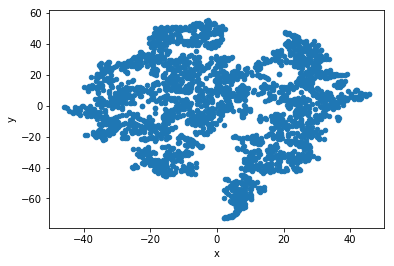

In [166]:
plt.show()

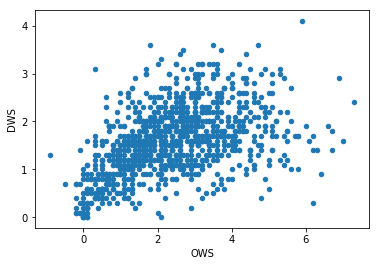

In [62]:
ncaa_clean.plot(x='OWS', y= 'DWS',kind='scatter')
plt.show()

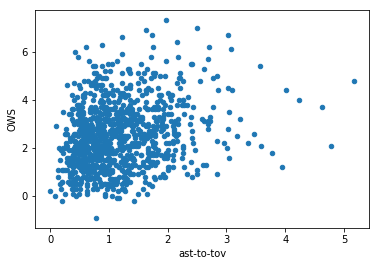

In [65]:
ncaa_clean.plot(y='OWS', x= 'ast-to-tov',kind='scatter')
plt.show()

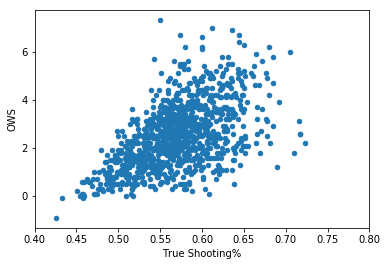

In [68]:
ncaa_clean.plot(x='True Shooting%', y= 'OWS',kind='scatter')
plt.xlim(0.4, 0.8)
plt.show()

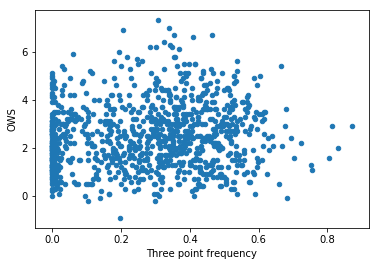

In [70]:
ncaa_clean.plot(x='Three point frequency', y= 'OWS',kind='scatter')
plt.show()

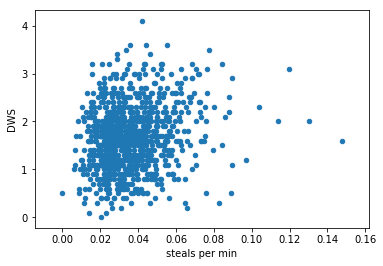

In [72]:
ncaa_clean.plot(y='DWS', x= 'steals per min',kind='scatter')
plt.show()

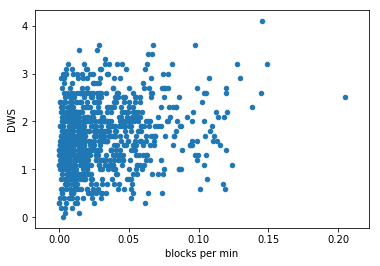

In [98]:
ncaa_clean.plot(y='DWS', x= 'blocks per min',kind='scatter')
plt.show()

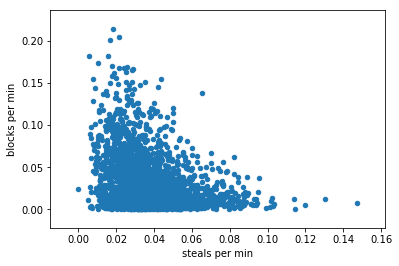

In [504]:
ncaa_clean.plot(y='blocks per min', x= 'steals per min',kind='scatter')
plt.show()

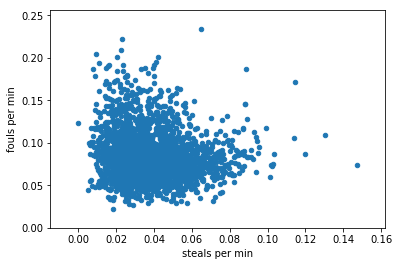

In [505]:
ncaa_clean.plot(y='fouls per min', x= 'steals per min',kind='scatter')
plt.show()

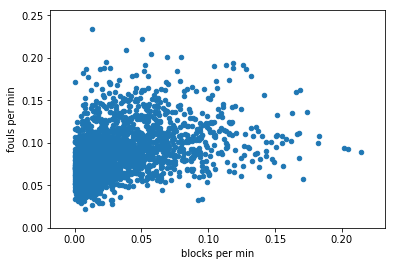

In [506]:
ncaa_clean.plot(y='fouls per min', x= 'blocks per min',kind='scatter')
plt.show()

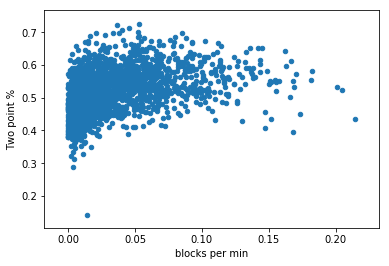

In [507]:
ncaa_clean.plot(y='Two point %', x= 'blocks per min',kind='scatter')
plt.show()

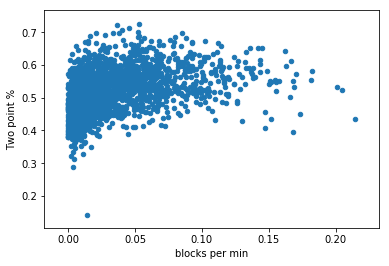

In [509]:
ncaa_clean.plot(y='Two point %', x= 'blocks per min',kind='scatter')
plt.show()

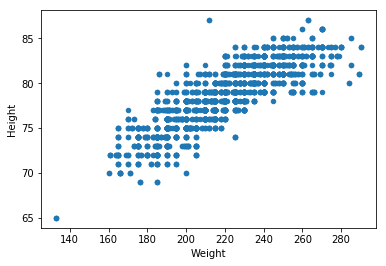

In [510]:
ncaa_clean.plot(y='Height', x= 'Weight',kind='scatter')
plt.show()

In [523]:
ncaa_clean.columns

Index(['Class', 'Season', 'Pos', 'Conf', 'G', 'MP', 'MP.1', 'FG_pg', 'FGA_pg',
       '2P_pg', '2PA_pg', '3P_pg', '3PA_pg', 'FT_pg', 'FTA_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg', 'FG_t', 'FGA_t', '2P_t', '2PA_t', '3P_t', '3PA_t', 'FT_t',
       'FTA_t', 'ORB_t', 'DRB_t', 'TRB_t', 'AST_t', 'STL_t', 'BLK_t', 'TOV_t',
       'PF_t', 'PTS_t', 'Effective FG%', 'True Shooting%',
       'Two Point Frequency', 'Three point frequency', 'Two point %',
       'Three point %', 'ast-to-tov', 'fta to fga', 'Offensive reb split',
       'Defensive reb split', 'fouls per min', 'blocks per min',
       'steals per min', 'Height', 'Weight', 'NBA_Experience', 'fg_to_ast'],
      dtype='object')

In [519]:
f = ncaa_clean.reset_index()
f.set_index(['index', 'Season'])

Class Pos      Conf     G      MP  MP.1  FG_pg  \
index               Season                                                   
A.J. Guyton         1999-00    SR   G   Big Ten  29.0   995.0  34.3    7.0   
                    1998-99    JR   G   Big Ten  34.0  1158.0  34.1    5.8   
                    1996-97    FR   G   Big Ten  33.0  1107.0  33.5    4.8   
Aaron Brooks        2006-07    SR   G    Pac-10  35.0  1289.0  36.8    6.1   
                    2004-05    SO   G    Pac-10  27.0   893.0  33.1    4.7   
                    2005-06    JR   G    Pac-10  32.0  1036.0  32.4    3.6   
                    2003-04    FR   G    Pac-10  21.0   541.0  25.8    2.2   
Aaron Gordon        2013-14    FR   F    Pac-12  38.0  1187.0  31.2    5.0   
Aaron Gray          2005-06    JR   C  Big East  33.0   920.0  27.9    5.2   
                    2006-07    SR   C  Big East  36.0  1016.0  28.2    5.7   
                    2004-05    SO   C  Big East  29.0   336.0  11.6    1.7   
Aaron Harrison      2014-15    SO   G       SEC  39.0  1004.0  25.7    3.7   
                    2013-14    FR   G       SEC  40.0  1303.0  32.6    4.4   
Aaron McKie         1992-93    JR   G      A-10  33.0  1272.0  38.5    7.3   
                    1993-94    SR   G      A-10  31.0  1214.0  39.2    6.2   
Abdel Nader         2015-16    SR   F    Big 12  35.0  1088.0  31.1    4.6   
                    2014-15    JR   F    Big 12  32.0   524.0  16.4    2.2   
Acie Earl           1992-93    SR   F   Big Ten  32.0   992.0  31.0    6.3   
Acie Law            2006-07    SR   G    Big 12  34.0  1153.0  33.9    6.4   
                    2005-06    JR   G    Big 12  30.0  1042.0  34.7    5.8   
                    2004-05    SO   G    Big 12  31.0   941.0  30.4    4.5   
                    2003-04    FR   G    Big 12  27.0   624.0  23.1    2.8   
Adam Harrington     2000-01    SO   G       SEC  31.0   927.0  29.9    5.2   
                    2001-02    JR   G       SEC  28.0   722.0  25.8    3.1   
Adam Morrison       2005-06    JR   F       WCC  33.0  1205.0  36.5    9.3   
                    2004-05    SO   F       WCC  31.0  1059.0  34.2    7.3   
                    2003-04    FR   F       WCC  31.0   644.0  20.8    4.4   
Adonal Foyle        1996-97    JR   C   Patriot  28.0  1055.0  37.7    9.9   
                    1995-96    SO   C   Patriot  29.0  1060.0  36.6    7.9   
                    1994-95    FR   C   Patriot  30.0  1063.0  35.4    6.9   
...                           ...  ..       ...   ...     ...   ...    ...   
Will Bynum          2003-04    JR   G       ACC  30.0   616.0  20.5    3.1   
William Avery       1998-99    SO   G       ACC  39.0  1210.0  31.0    5.2   
Willie Cauley-Stein 2014-15    JR   F       SEC  39.0  1012.0  25.9    3.5   
                    2013-14    SO   F       SEC  37.0   880.0  23.8    2.9   
                    2012-13    FR   F       SEC  29.0   683.0  23.6    3.6   
Willie Green        2002-03    SR   G   Horizon  30.0  1021.0  34.0    8.1   
                    2001-02    JR   G   Horizon  29.0   888.0  30.6    5.1   
                    2000-01    SO   G   MW Coll  33.0  1012.0  30.7    5.1   
                    1999-00    FR   G   MW Coll  32.0   800.0  25.0    2.8   
Willie Warren       2009-10    SO   G    Big 12  21.0   678.0  32.3    5.0   
                    2008-09    FR   G    Big 12  36.0  1128.0  31.3    4.8   
Wilson Chandler     2006-07    SO   F  Big East  34.0  1078.0  31.7    5.7   
                    2005-06    FR   F  Big East  25.0   756.0  30.2    4.2   
Xavier Munford      2012-13    JR   G      A-10  29.0  1027.0  35.4    5.8   
                    2013-14    SR   G      A-10  32.0  1139.0  35.6    5.8   
Xavier Silas        2010-11    SR   G       MAC  26.0   831.0  32.0    6.8   
                    2009-10    JR   G       MAC  25.0   789.0  31.6    5.6   
Yakhouba Diawara    2003-04    JR   F       WCC  14.0   476.0  34.0    6.3   
                    2004-05    SR   F       WCC  3

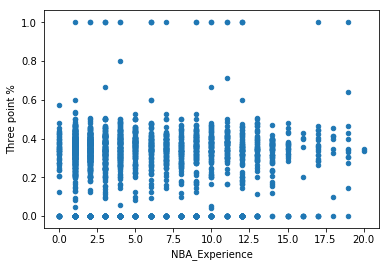

In [525]:
ncaa_clean.plot(y='Three point %', x= 'NBA_Experience',kind='scatter')
plt.show()

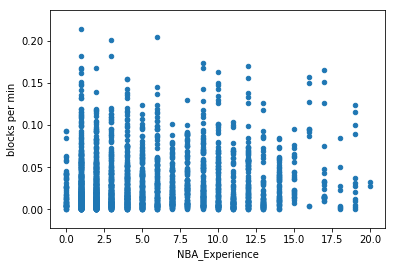

In [522]:
ncaa_clean.plot(y='blocks per min', x= 'NBA_Experience',kind='scatter')
plt.show()

In [8]:
for i in range(len(nba_stats.columns)):
    print(nba_stats.columns[i])

DISPLAY_FIRST_LAST
GROUP_VALUE
AST
AST_PCT
AST_PCT_RANK
AST_RANK
AST_RATIO
AST_RATIO_RANK
AST_TO
AST_TO_RANK
BIRTHDATE
BLK
BLKA
BLKA_RANK
BLK_RANK
CFID_x
CFID_y
CFPARAMS_x
CFPARAMS_y
COUNTRY
DD2
DD2_RANK
DEF_RATING
DEF_RATING_RANK
DRAFT_NUMBER
DRAFT_ROUND
DRAFT_YEAR
DREB
DREB_PCT
DREB_PCT_RANK
DREB_RANK
EFG_PCT
EFG_PCT_RANK
FG3A
FG3A_RANK
FG3M
FG3M_RANK
FG3_PCT
FG3_PCT_RANK
FGA_PG
FGA_PG_RANK
FGA_RANK_x
FGA_RANK_y
FGA_x
FGA_y
FGM_PG
FGM_PG_RANK
FGM_RANK_x
FGM_RANK_y
FGM_x
FGM_y
FG_PCT_RANK_x
FG_PCT_RANK_y
FG_PCT_x
FG_PCT_y
FROM_YEAR
FTA
FTA_RANK
FTM
FTM_RANK
FT_PCT
FT_PCT_RANK
GP
GP_RANK_x
GP_RANK_y
HEIGHT
L
L_RANK_x
L_RANK_y
MIN
MIN_RANK_x
MIN_RANK_y
NBA_FANTASY_PTS
NBA_FANTASY_PTS_RANK
NET_RATING
NET_RATING_RANK
OFF_RATING
OFF_RATING_RANK
OREB
OREB_PCT
OREB_PCT_RANK
OREB_RANK
PACE
PACE_RANK
PERSON_ID
PF
PFD
PFD_RANK
PF_RANK
PIE
PIE_RANK
PLUS_MINUS
PLUS_MINUS_RANK
POSITION
PTS
PTS_RANK
Player_Name
REB
REB_PCT
REB_PCT_RANK
REB_RANK
SCHOOL
SEASON_EXP
STL
STL_RANK
TD3
TD3_RANK
TEAM_ID
TM

In [28]:
nba_stats[nba_stats['FROM_YEAR'] < 2013]['SEASON_EXP'] <4

DISPLAY_FIRST_LAST
Earl Cureton         False
Andrew Gaze           True
Chris Jent            True
Adonis Jordan         True
Chris King            True
Jimmy Oliver         False
Jimmy Oliver         False
Jimmy Oliver         False
Willie Burton        False
Willie Burton        False
Willie Burton        False
Tom Chambers         False
Tom Chambers         False
Lloyd Daniels        False
Lloyd Daniels        False
Lloyd Daniels        False
Lloyd Daniels        False
Blue Edwards         False
Blue Edwards         False
Blue Edwards         False
Negele Knight        False
Larry Krystkowiak    False
Eric Mobley           True
Brian Oliver          True
Fred Vinson           True
Ennis Whatley        False
Sharone Wright        True
Sharone Wright        True
Derrick Alston        True
Ashraf Amaya          True
                     ...  
Nick Young           False
Nick Young           False
Nick Young           False
Nick Young           False
Nick Young           False
Nick Youn